<a href="https://colab.research.google.com/github/mosly/IGSR-DataAnalytics-LSTM/blob/master/Amzon_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

In [2]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [3]:
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/Amazon-Product.csv")

# Preprocess the data
X = df['review_body'].astype(str)
y = df['sentiment']

Mounted at /content/drive


In [4]:
print("Length of X:", len(X))
print("Length of y:", len(y))


Length of X: 30846
Length of y: 30846


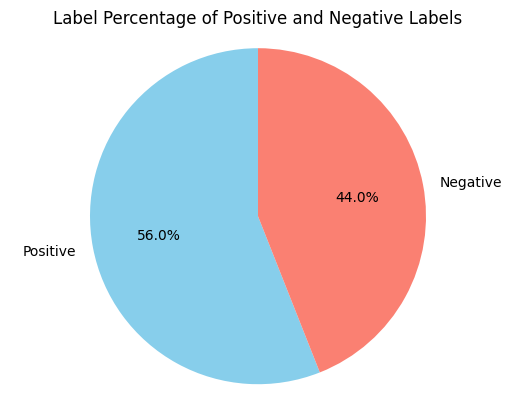

In [5]:



# Generate some example data
np.random.seed(0)
p = np.random.choice([-1, 1], size=100)  # Random positive and negative labels

# Count the occurrences of positive and negative labels
positive_count = np.sum(p == 1)
negative_count = np.sum(p == -1)

# Create labels and counts for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Label Percentage of Positive and Negative Labels')

# Show plot
plt.show()


In [6]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in X_sequences])
X_pad = pad_sequences(X_sequences, maxlen=max_sequence_length)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

In [7]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0))
model.add(Dense(3, activation='softmax'))  # 3 output neurons for Positive, Negative, Neutral


In [8]:

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:

# Train the model

model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/7
386/386 [==============================] - 90s 220ms/step - loss: 0.3025 - accuracy: 0.8740 - val_loss: 0.2483 - val_accuracy: 0.8977
Epoch 2/7
386/386 [==============================] - 63s 164ms/step - loss: 0.2012 - accuracy: 0.9214 - val_loss: 0.2190 - val_accuracy: 0.9107
Epoch 3/7
386/386 [==============================] - 51s 132ms/step - loss: 0.1651 - accuracy: 0.9398 - val_loss: 0.2243 - val_accuracy: 0.9094
Epoch 4/7
386/386 [==============================] - 44s 114ms/step - loss: 0.1405 - accuracy: 0.9493 - val_loss: 0.2338 - val_accuracy: 0.9115
Epoch 5/7
386/386 [==============================] - 46s 119ms/step - loss: 0.1220 - accuracy: 0.9577 - val_loss: 0.2706 - val_accuracy: 0.9053
Epoch 6/7
386/386 [==============================] - 43s 110ms/step - loss: 0.1032 - accuracy: 0.9642 - val_loss: 0.2910 - val_accuracy: 0.9032
Epoch 7/7
386/386 [==============================] - 44s 114ms/step - loss: 0.0852 - accuracy: 0.9725 - val_loss: 0.3093 - val_accuracy:

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

193/193 [==============================] - 6s 31ms/step - loss: 0.3093 - accuracy: 0.9011


In [11]:

# New text data for prediction
new_texts = ["the battery goes dead more quickly than you'd expect", "Would definately Fire HD", "I love this Product"]

# Tokenize and pad the new text data
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Make predictions
predictions = model.predict(new_padded_sequences)

# Convert predictions to sentiment labels
sentiment_labels = ['Positive', 'Negative', 'Neutral']
predicted_labels = [sentiment_labels[np.argmax(pred)] for pred in predictions]

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis using VADER
vader_sentiments = [sid.polarity_scores(text) for text in new_texts]

# Print predictions
for i, (text, label) in enumerate(zip(new_texts, predicted_labels)):
    vader_label = 'Positive' if vader_sentiments[i]['compound'] >= 0.05 else 'Negative' if vader_sentiments[i]['compound'] <= -0.05 else 'Neutral'
    print(f'Sentiment (VADER): {vader_label}')



1/1 [==============================] - 0s 428ms/step
Text: the battery goes dead more quickly than you'd expect --> Sentiment: Negative
Text: Would definately recommend Fire HD --> Sentiment: Positive
Text: the product is netural --> Sentiment: Negative
